In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np


In [154]:
df = pd.read_csv('withMinMaxStd.csv')
df_unique = df
df_unique = df_unique.drop_duplicates('geohash6')

In [50]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
def dist_between_points(latitude1,longitude1,laititude2,longitude2):
    R = 6373.0
    lat1 = radians(latitude1)
    lon1 = radians(longitude1)
    lat2 = radians(laititude2)
    lon2 = radians(longitude2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c

# mdDf = df_unique
# print(mdDf.head())
# print(mdDf.lat.iloc[0])
# print(mdDf.long.iloc[0])

def dist(xdf):
    dist = dist_between_points(cluster_mid[0],cluster_mid[1], xdf.lat, xdf.long)
    return dist
# mdDf['minDist'] = mdDf.apply(dist, axis=1)
# mdDf.head()

In [4]:
minD = pd.DataFrame()
minD['minDist'] = mdDf['minDist']
minD['geohash6'] = mdDf['geohash6']
minD.sort_values('minDist', ascending=True,inplace=True)
print(minD.head())

       minDist geohash6
0     0.000000   qp09sx
506   0.009665   qp09u8
438   0.009665   qp09sw
6138  0.019330   qp09u9
2949  0.019330   qp09st


    minDist
0  0.000000
1  0.009665
2  0.009665
3  0.019330
4  0.019330


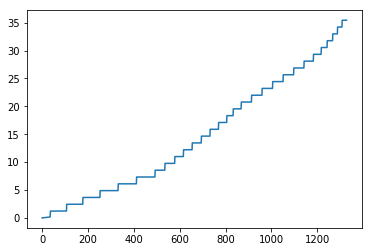

In [5]:
plotdf = minD
plotdf.drop('geohash6', axis=1, inplace=True)
plotdf = plotdf.reset_index(drop=True)
print(plotdf.head())
plt.plot(plotdf)

In [137]:
# df_sample = df.sample(10000)
df_sample = df_unique

/Users/rong/anaconda3/envs/grab/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


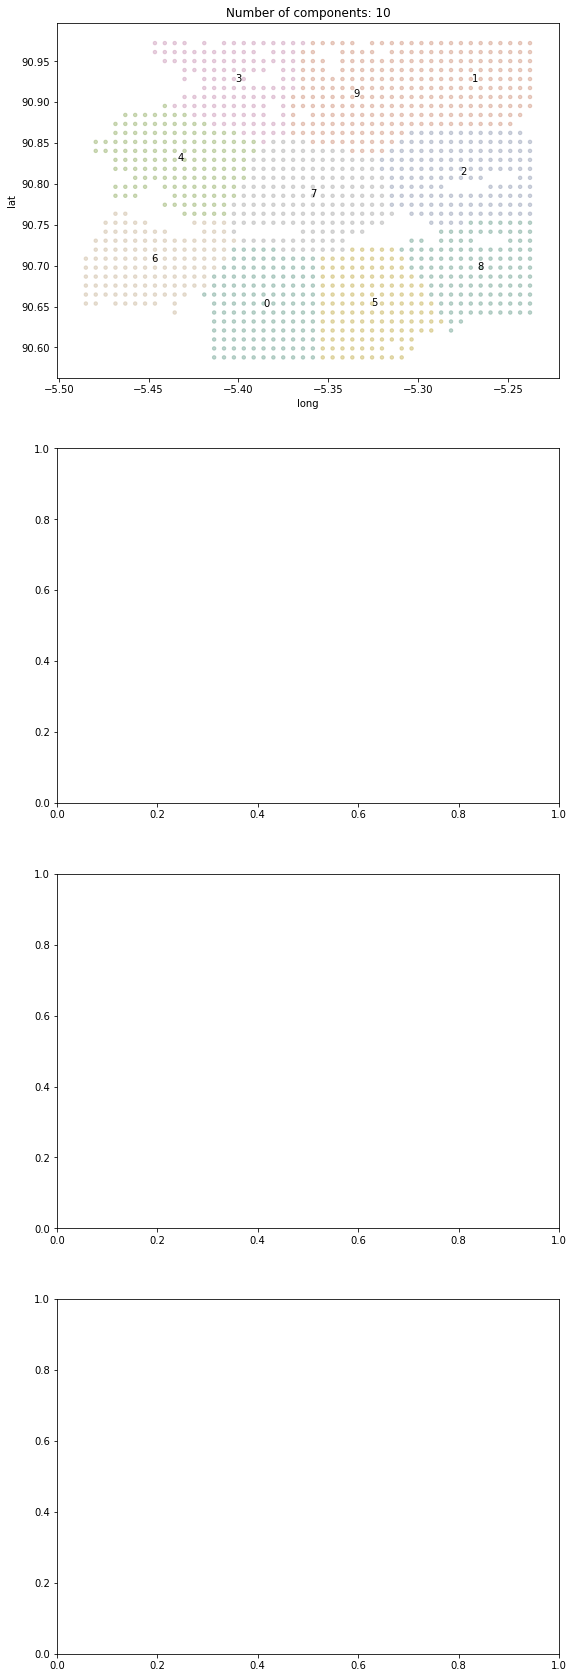

In [138]:
fig, ax = plt.subplots(4,1,figsize=(9,30))
for ix, ncomp in enumerate([10]):
    r = KMeans(ncomp, random_state=1)
    # Normalize (longitude, latitude) before K-means
    temp = df_sample[['long', 'lat']].copy()
    temp['long'] = (temp['long']-temp['lat'].mean())/temp['long'].std()
    temp['lat'] = (temp['lat']-temp['lat'].mean())/temp['lat'].std()
    # Fit k-means and get labels
    r.fit(temp[['long', 'lat']])
    df_sample['labels'] = r.labels_
    # Plot results
    cols = sns.color_palette("Set2", n_colors=ncomp, desat=.5)
    cl = [cols[i] for i in r.labels_]
    area = 12
    ax[ix].scatter(df_sample.long, df_sample.lat, s=area, c=cl, alpha=0.5);
    ax[ix].set_title('Number of components: ' + str(ncomp))
    ax[ix].set_xlabel('long')
    ax[ix].set_ylabel('lat')
    extent = ax[ix].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    ax[ix].get_figure().savefig('{}_unique.png'.format(ix), bbox_inches=extent)
    # Show aggregated volume and interest at each neighborhood
    x = df_sample.groupby('labels')[['long','lat','demand']].mean().sort_values(['demand'])
    x = pd.concat([x, df_sample['labels'].value_counts()], axis=1).sort_values(['demand'])
    cols = sns.color_palette("RdBu_r", ncomp)[::-1]
    y = df_sample.groupby('labels', as_index=False)[['long','lat','demand']].mean()
    z = df_sample
    for i in range(ncomp):
        props = dict(boxstyle='round', facecolor=cols[i], alpha=0.8)
#         ax[ix].text(x.long.values[i], x.lat.values[i], 
#                 str(np.array(np.round(x.demand.values,2), '|S8')[i])+'\n this is label: '+str(np.array(x['labels'].values, '|S8')[i]), 
#                 fontsize=9, verticalalignment='center', horizontalalignment='center', bbox=props);
        ax[ix].text(y.long.values[i], y.lat.values[i], y.labels.values[i])

In [139]:
df_save = df_sample
df_save.rename(columns={'labels':'zones'}, inplace= True)
df_save.to_csv('uniqueZones10.csv', index=False)
df_save.head()

/Users/rong/anaconda3/envs/grab/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,geohash6,day,timestamp,demand,long,lat,latlong,min,max,std,zones
0,qp09sx,1,0:0,0.021212,-5.320129,90.906372,"(90.9063720703125, -5.32012939453125)",0.000006,0.450142,0.068041,9
1,qp0dhg,1,0:0,0.013217,-5.254211,90.917358,"(90.9173583984375, -5.25421142578125)",0.000017,0.157653,0.022231,1
2,qp03x5,1,0:0,0.157956,-5.342102,90.664673,"(90.6646728515625, -5.34210205078125)",0.001488,0.804184,0.121088,5
3,qp09bw,1,0:0,0.001262,-5.281677,90.730591,"(90.7305908203125, -5.28167724609375)",0.000002,0.506040,0.051160,8
4,qp03wn,1,0:0,0.032721,-5.325623,90.620728,"(90.6207275390625, -5.32562255859375)",0.000003,0.341465,0.037449,5


In [140]:
myZoneDict = dict(zip(df_save.geohash6, df_save.zones)) 
df_new = df
df_new['zone'] = df_new['geohash6'].map(myZoneDict)
df_new.head()
print(df_new.zone.value_counts())
df_new.shape

0    662438
5    631459
7    569867
9    430665
8    398003
2    378825
4    316414
1    307581
6    290913
3    220156
Name: zone, dtype: int64


(4206321, 11)

In [141]:
# Check daily highest demand zone daily
df_new2 = df_new.groupby(['day','zone'], as_index= False)['demand'].sum()
df_new2.head(10)

,day,zone,demand
0,1,0,781.834094
1,1,1,369.815319
2,1,2,392.624544
3,1,3,210.258574
4,1,4,283.554440
5,1,5,1372.117895
6,1,6,416.061971
7,1,7,1495.185806
8,1,8,384.767040
9,1,9,627.132867


Empty DataFrame
Columns: [day, zone, demand, count_max]
Index: []


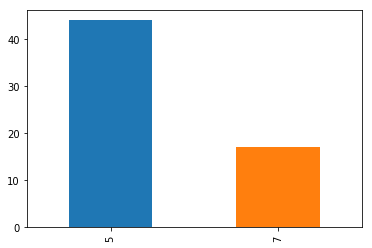

In [142]:
# df_new3 = df_new2.groupby(['day','zone']).agg({'demand':'max'})
df_new3 = df_new2
# df_new3['day'] = df_new3.index
# df_new3 = df_new3.reset_index(drop=True)
# df_new3.set_index('day', inplace=True)
# df_new4 = df_new3.groupby(['day','zone']).agg({'demand':'max'})
# df_new4 = df_new4.reset_index()
# df_new3.loc[df_new3.groupby('day').idxmax().iloc[:, 0]]
# df_new3 = df_new3.loc[df_new3.groupby(["day",'zone'])["demand"].idxmax()]
# df_new3.sort_index(inplace=True)
df_new3['count_max'] = df_new3.groupby(['day'])['demand'].transform(max)
# df_new3['max'] = df_new3.loc[df_new3.groupby('day')['demand'].transform(max)]
df_new3 = df_new3.loc[df_new3.groupby(['day'], as_index=False)["demand"].idxmax()]
# df_new3 = df_new3.sort_values('demand').drop_duplicates(['day'],keep='last')
# df_new3 = df_new3.sort_values('day')
# df_new3.set_index('day', inplace=True)
df_new3['zone'].value_counts().plot.bar()
print(df_new3.loc[df_new3.zone == 4])
# df_new3.head(10)

In [143]:
df_new4 = df_new
lat = df_new4.loc[df_new4.zone == 5]['lat']
long = df_new4.loc[df_new4.zone== 5]['long']

cluster_mid = ((sum(lat)/len(lat)),(sum(long)/len(long)))
print(cluster_mid)
df_new4['dist_to_high_demand5'] = df_new4.apply(dist, axis=1)
df_new5 = df_new4
df_new5.sort_values('dist_to_high_demand5', ascending=True, inplace=True)
df_new5.sort_values(['day','timestamp'], ascending=True, inplace=True)
df_new5.sort_index(inplace=True)
df_new5.head()

(90.65827922855449, -5.328303492399861)


,geohash6,day,timestamp,demand,long,lat,latlong,min,max,std,zone,dist_to_high_demand5
0,qp09sx,1,0:0,0.021212,-5.320129,90.906372,"(90.9063720703125, -5.32012939453125)",0.000006,0.450142,0.068041,9,27.595328
1,qp0dhg,1,0:0,0.013217,-5.254211,90.917358,"(90.9173583984375, -5.25421142578125)",0.000017,0.157653,0.022231,1,28.817550
2,qp03x5,1,0:0,0.157956,-5.342102,90.664673,"(90.6646728515625, -5.34210205078125)",0.001488,0.804184,0.121088,5,0.711382
3,qp09bw,1,0:0,0.001262,-5.281677,90.730591,"(90.7305908203125, -5.28167724609375)",0.000002,0.506040,0.051160,8,8.043451
4,qp03wn,1,0:0,0.032721,-5.325623,90.620728,"(90.6207275390625, -5.32562255859375)",0.000003,0.341465,0.037449,5,4.176869


In [147]:
df_new7 = df_new5.copy(deep=True)

lat7 = df_new7.loc[df_new7.zone == 7]['lat']
long7 = df_new7.loc[df_new7.zone== 7]['long']

cluster7_mid = ((sum(lat7)/len(lat7)), (sum(long7)/len(long7)))
print(cluster7_mid)

def dist7(xdf):
    dist = dist_between_points(cluster7_mid[0],cluster7_mid[1], xdf.lat, xdf.long)
    return dist

df_new7['dist_to_7'] = df_new7.apply(dist7, axis=1)
df_new7.sort_values('dist_to_7', ascending=True, inplace=True)
df_new7.sort_values(['day','timestamp'], ascending=True, inplace=True)
df_new7.sort_index(inplace=True)
df_new7.head()

(90.7845731748815, -5.357779662298293)


,geohash6,day,timestamp,demand,long,lat,latlong,min,max,std,zone,dist_to_high_demand5,dist_to_7
0,qp09sx,1,0:0,0.021212,-5.320129,90.906372,"(90.9063720703125, -5.32012939453125)",0.000006,0.450142,0.068041,9,27.595328,13.547811
1,qp0dhg,1,0:0,0.013217,-5.254211,90.917358,"(90.9173583984375, -5.25421142578125)",0.000017,0.157653,0.022231,1,28.817550,14.770663
2,qp03x5,1,0:0,0.157956,-5.342102,90.664673,"(90.6646728515625, -5.34210205078125)",0.001488,0.804184,0.121088,5,0.711382,13.336511
3,qp09bw,1,0:0,0.001262,-5.281677,90.730591,"(90.7305908203125, -5.28167724609375)",0.000002,0.506040,0.051160,8,8.043451,6.005490
4,qp03wn,1,0:0,0.032721,-5.325623,90.620728,"(90.6207275390625, -5.32562255859375)",0.000003,0.341465,0.037449,5,4.176869,18.224575


In [148]:
df_new7['dist_to_peak'] = df_new7[['dist_to_high_demand5','dist_to_7']].min(axis=1)
df_new7.head()

,geohash6,day,timestamp,demand,long,lat,latlong,min,max,std,zone,dist_to_high_demand5,dist_to_7,dist_to_peak
0,qp09sx,1,0:0,0.021212,-5.320129,90.906372,"(90.9063720703125, -5.32012939453125)",0.000006,0.450142,0.068041,9,27.595328,13.547811,13.547811
1,qp0dhg,1,0:0,0.013217,-5.254211,90.917358,"(90.9173583984375, -5.25421142578125)",0.000017,0.157653,0.022231,1,28.817550,14.770663,14.770663
2,qp03x5,1,0:0,0.157956,-5.342102,90.664673,"(90.6646728515625, -5.34210205078125)",0.001488,0.804184,0.121088,5,0.711382,13.336511,0.711382
3,qp09bw,1,0:0,0.001262,-5.281677,90.730591,"(90.7305908203125, -5.28167724609375)",0.000002,0.506040,0.051160,8,8.043451,6.005490,6.005490
4,qp03wn,1,0:0,0.032721,-5.325623,90.620728,"(90.6207275390625, -5.32562255859375)",0.000003,0.341465,0.037449,5,4.176869,18.224575,4.176869


In [149]:
df_la = df_new7.copy(deep=True)
df_la = df_la.groupby('zone')['demand'].sum()
df_la.sort_values( ascending=True, inplace=True)
df_lala = pd.DataFrame(df_la)
df_lala['zones'] = df_lala.index
df_lala = df_lala.reset_index(drop=True)
myZoneDict = dict(zip(df_lala.zones, df_lala.index+1))
print(myZoneDict)
df_lala.head(20)

{3: 1, 4: 2, 8: 3, 1: 4, 2: 5, 6: 6, 9: 7, 0: 8, 7: 9, 5: 10}


,demand,zones
0,14355.032543,3
1,18158.470757,4
2,23881.224606,8
3,24169.183716,1
4,25082.707791,2
5,31119.041433,6
6,46002.746419,9
7,56852.114448,0
8,95435.691638,7
9,106988.987111,5


In [150]:
df_new6 = df_new7.copy(deep=True)
df_new6['zone'] = df_new6['zone'].map(myZoneDict)
df_new6.head()

,geohash6,day,timestamp,demand,long,lat,latlong,min,max,std,zone,dist_to_high_demand5,dist_to_7,dist_to_peak
0,qp09sx,1,0:0,0.021212,-5.320129,90.906372,"(90.9063720703125, -5.32012939453125)",0.000006,0.450142,0.068041,7,27.595328,13.547811,13.547811
1,qp0dhg,1,0:0,0.013217,-5.254211,90.917358,"(90.9173583984375, -5.25421142578125)",0.000017,0.157653,0.022231,4,28.817550,14.770663,14.770663
2,qp03x5,1,0:0,0.157956,-5.342102,90.664673,"(90.6646728515625, -5.34210205078125)",0.001488,0.804184,0.121088,10,0.711382,13.336511,0.711382
3,qp09bw,1,0:0,0.001262,-5.281677,90.730591,"(90.7305908203125, -5.28167724609375)",0.000002,0.506040,0.051160,3,8.043451,6.005490,6.005490
4,qp03wn,1,0:0,0.032721,-5.325623,90.620728,"(90.6207275390625, -5.32562255859375)",0.000003,0.341465,0.037449,10,4.176869,18.224575,4.176869


In [151]:
df_new8 = df_new6
df_new8['hour'] = df_new8.apply(lambda x : x.timestamp.split(':')[0], axis=1)
df_new8['hour'] = df_new8['hour'].astype(int)
df_new8['minute'] = df_new8.apply(lambda x: x.timestamp.split(':')[1], axis = 1)
df_new8['minute'] = df_new8['min'].astype(int)
print(type(df_new8['hour'][0]))
print(type(df_new8['min'][0]))
df_new8.head()

<class 'numpy.int64'>
<class 'numpy.float64'>


,geohash6,day,timestamp,demand,long,lat,latlong,min,max,std,zone,dist_to_high_demand5,dist_to_7,dist_to_peak,hour,minute
0,qp09sx,1,0:0,0.021212,-5.320129,90.906372,"(90.9063720703125, -5.32012939453125)",0.000006,0.450142,0.068041,7,27.595328,13.547811,13.547811,0,0
1,qp0dhg,1,0:0,0.013217,-5.254211,90.917358,"(90.9173583984375, -5.25421142578125)",0.000017,0.157653,0.022231,4,28.817550,14.770663,14.770663,0,0
2,qp03x5,1,0:0,0.157956,-5.342102,90.664673,"(90.6646728515625, -5.34210205078125)",0.001488,0.804184,0.121088,10,0.711382,13.336511,0.711382,0,0
3,qp09bw,1,0:0,0.001262,-5.281677,90.730591,"(90.7305908203125, -5.28167724609375)",0.000002,0.506040,0.051160,3,8.043451,6.005490,6.005490,0,0
4,qp03wn,1,0:0,0.032721,-5.325623,90.620728,"(90.6207275390625, -5.32562255859375)",0.000003,0.341465,0.037449,10,4.176869,18.224575,4.176869,0,0


In [152]:
df_new8.to_csv('distToMid10.csv', index=False)

In [38]:
df_sample = df.sample(10000)

In [ ]:
fig, ax = plt.subplots(4,1,figsize=(9,30))
for ix, ncomp in enumerate([5, 10, 20, 40]):
    r = KMeans(ncomp, random_state=1)
    # Normalize (longitude, latitude) before K-means
    temp = df_sample[['long', 'lat']].copy()
    temp['long'] = (temp['long']-temp['lat'].mean())/temp['long'].std()
    temp['lat'] = (temp['lat']-temp['lat'].mean())/temp['lat'].std()
    # Fit k-means and get labels
    r.fit(temp[['long', 'lat']])
    df_sample['labels'] = r.labels_
    # Plot results
    cols = sns.color_palette("Set2", n_colors=ncomp, desat=.5)
    cl = [cols[i] for i in r.labels_]
    area = 12
    ax[ix].scatter(df_sample.long, df_sample.lat, s=area, c=cl, alpha=0.5);
    ax[ix].set_title('Number of components: ' + str(ncomp))
    ax[ix].set_xlabel('long')
    ax[ix].set_ylabel('lat')
    extent = ax[ix].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    ax[ix].get_figure().savefig('{}_sample.png'.format(ix), bbox_inches=extent)
    # Show aggregated volume and interest at each neighborhood
    x = df_sample.groupby('labels')[['long','lat','demand']].mean().sort_values(['demand'])
    x = pd.concat([x, df_sample['labels'].value_counts()], axis=1).sort_values(['demand'])
    cols = sns.color_palette("RdBu_r", ncomp)[::-1]
    for i in range(ncomp):
        props = dict(boxstyle='round', facecolor=cols[i], alpha=0.8)
        ax[ix].text(x.long.values[i], x.lat.values[i], 
                str(np.array(np.round(x.demand.values,2), '|S8')[i])+'\n'+str(np.array(x['labels'].values, '|S8')[i]), 
                fontsize=9, verticalalignment='center', horizontalalignment='center', bbox=props);

In [ ]:
df_sample.head()

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(9,30))
for ix, ncomp in enumerate([1,0.0001,0.001]):
    kms_per_radian = 6371.0088
    epsilon = ncomp / kms_per_radian
    db = DBSCAN(eps=epsilon,min_samples=20,algorithm='ball_tree',metric='haversine')
    # Fit and get labels
    db.fit_predict(np.radians(df_sample[['lat','long']].values))
    df_sample['labels'] = db.labels_
    n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
    # Plot results
    cols = sns.color_palette("Set2", n_colors=n_clusters, desat=.5)
    cl = [cols[i] for i in db.labels_]
    area = 12
    ax[ix].scatter(df_sample.long, df_sample.lat, s=area, c=cl, alpha=0.5);
    ax[ix].set_title('Number of components: ' + str(n_clusters) + ", "+str(ncomp) )
    ax[ix].set_xlabel('Longitude')
    ax[ix].set_ylabel('Latitude')
    # Show aggregated volume and interest at each neighborhood
    x = df_sample.groupby('labels')[['long','lat','demand']].mean().sort_values(['demand'])
    x = pd.concat([x, df_sample['labels'].value_counts()], axis=1).sort_values(['demand'])
    cols = sns.color_palette("RdBu_r", n_clusters)[::-1]
    for i in range(n_clusters):
        props = dict(boxstyle='round', facecolor=cols[i], alpha=0.8)
        ax[ix].text(x.long.values[i], x.lat.values[i], 
                str(np.array(np.round(x.demand.values,2), '|S8')[i])+'\n'+str(np.array(x['labels'].values, '|S8')[i]), 
                fontsize=9, verticalalignment='center', horizontalalignment='center', bbox=props);